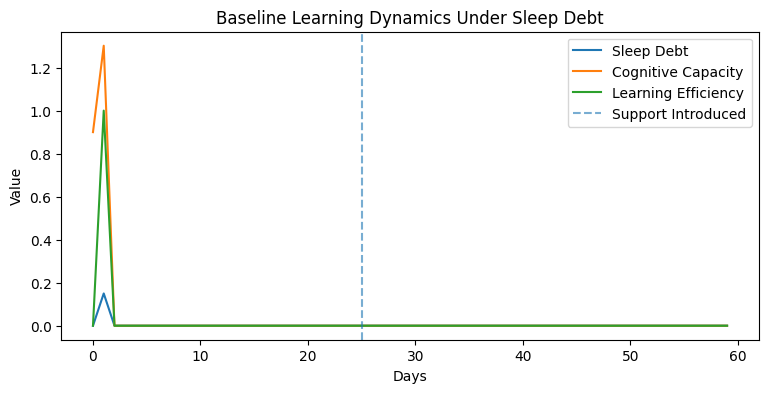

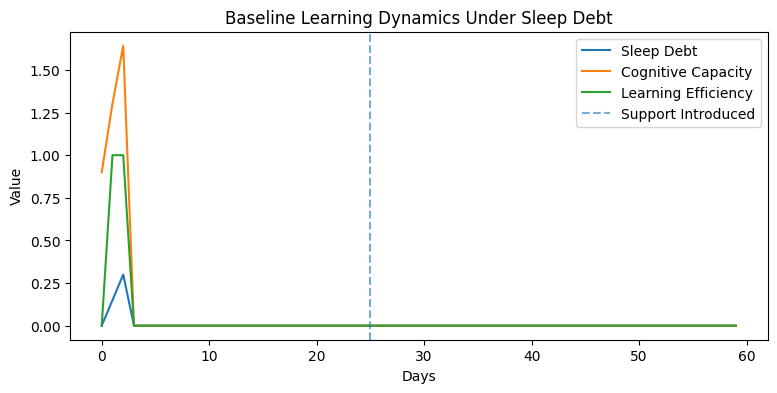

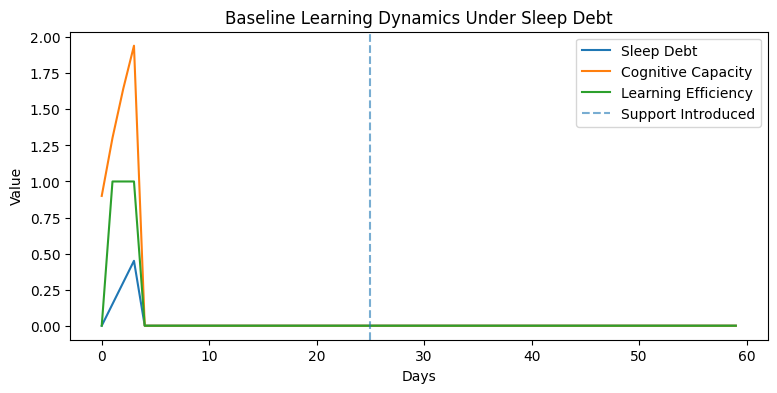

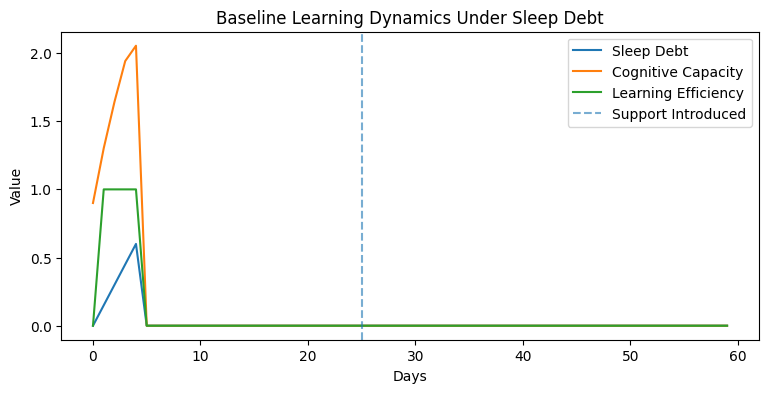

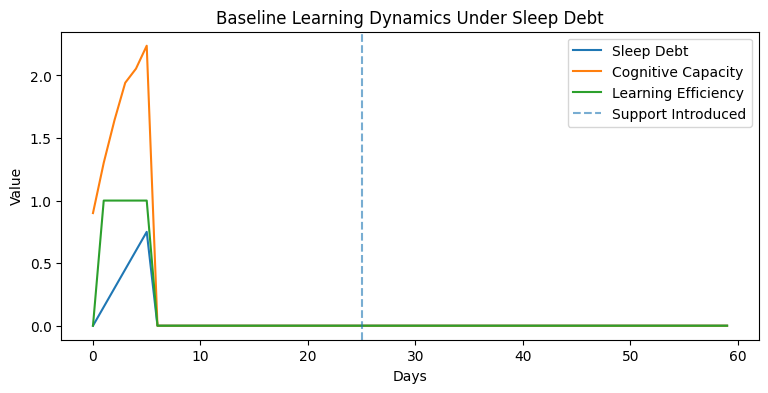

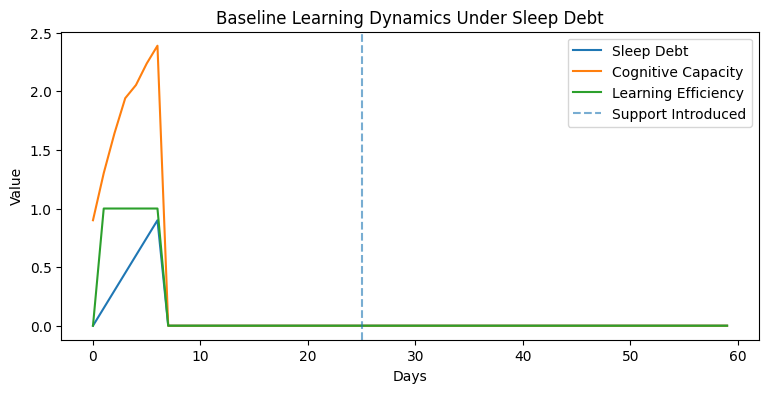

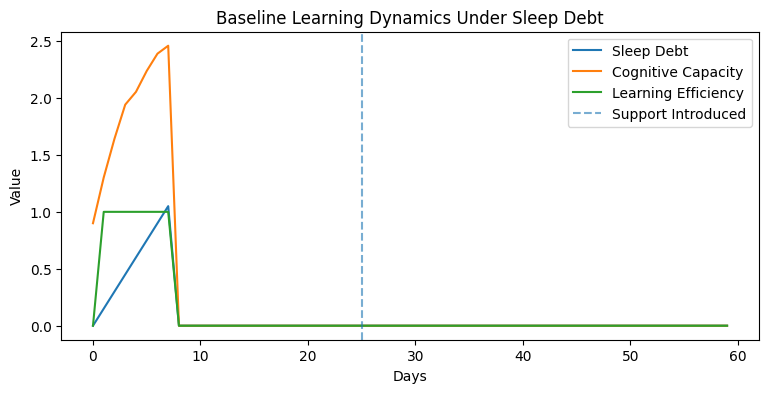

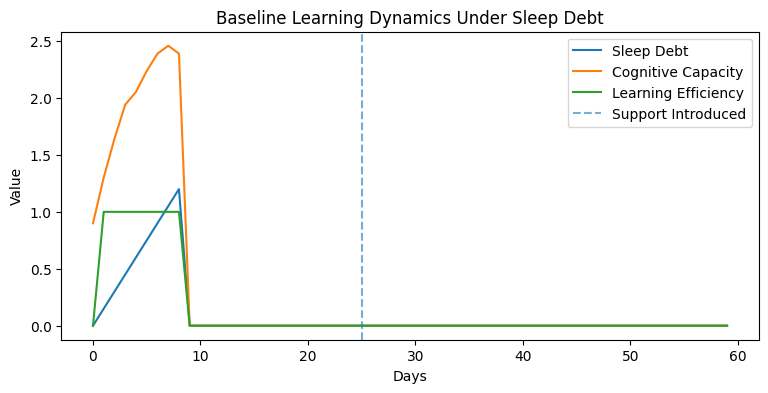

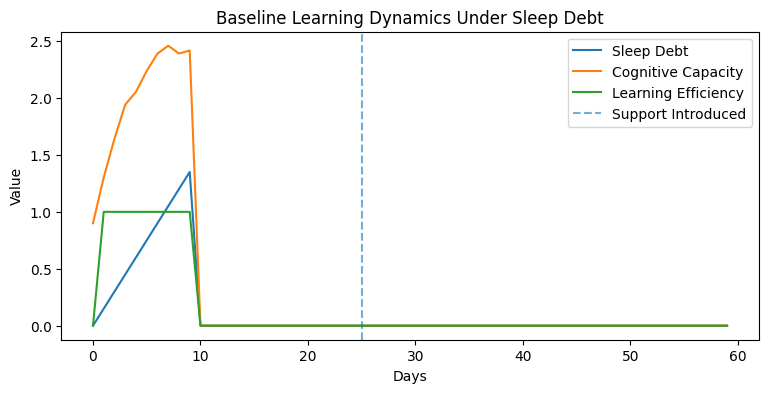

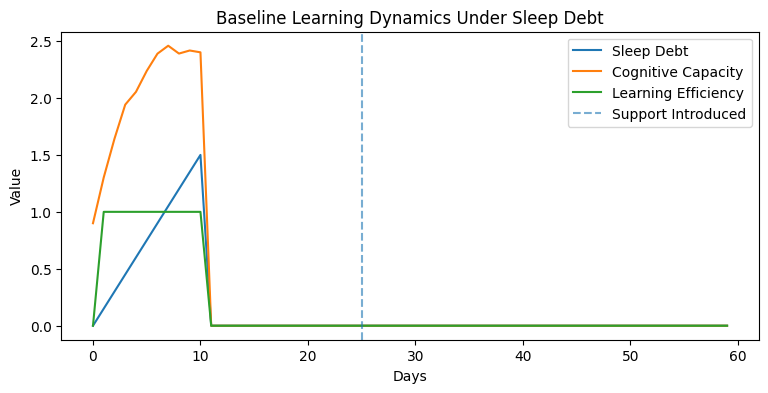

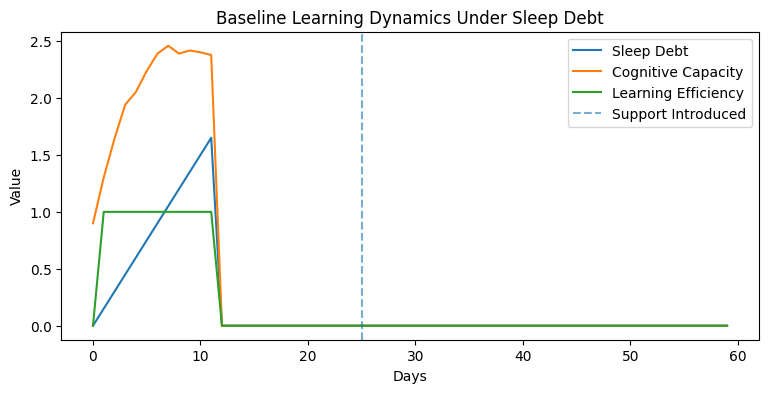

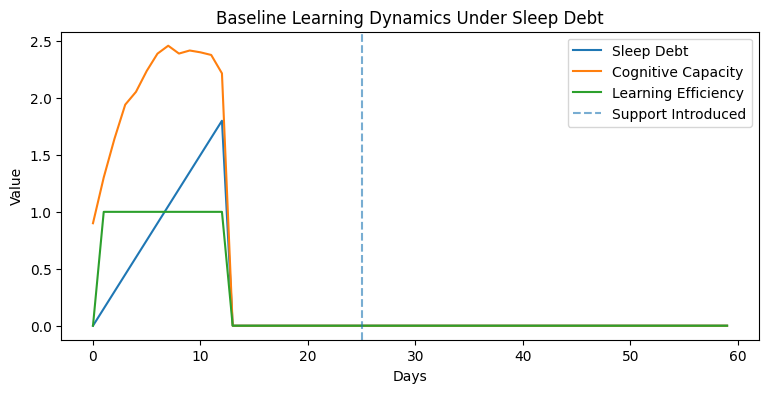

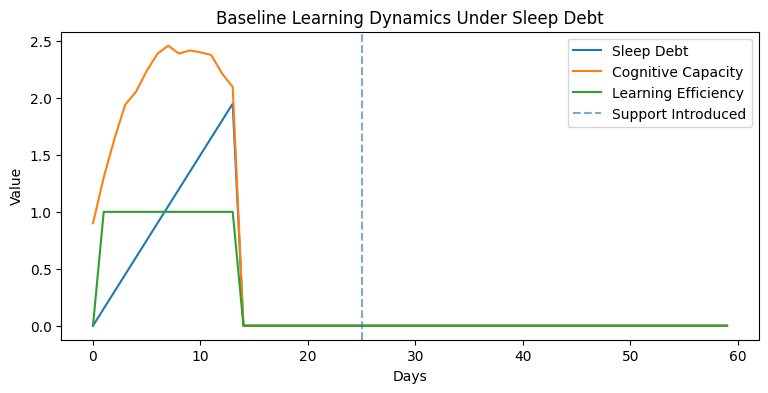

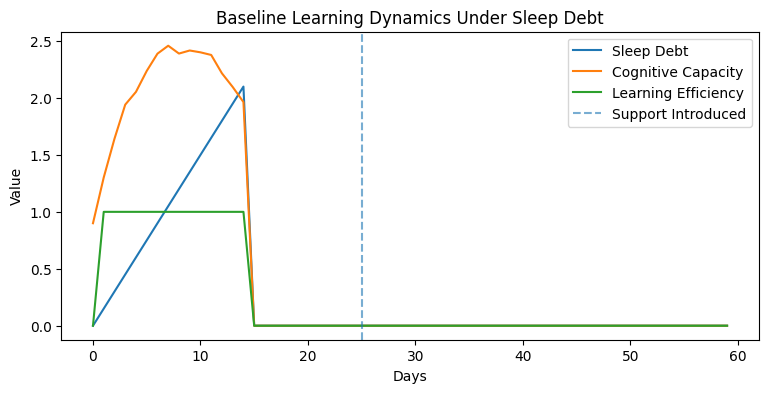

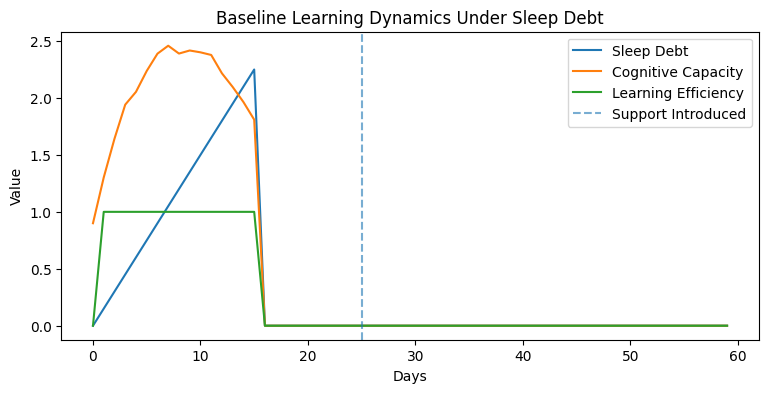

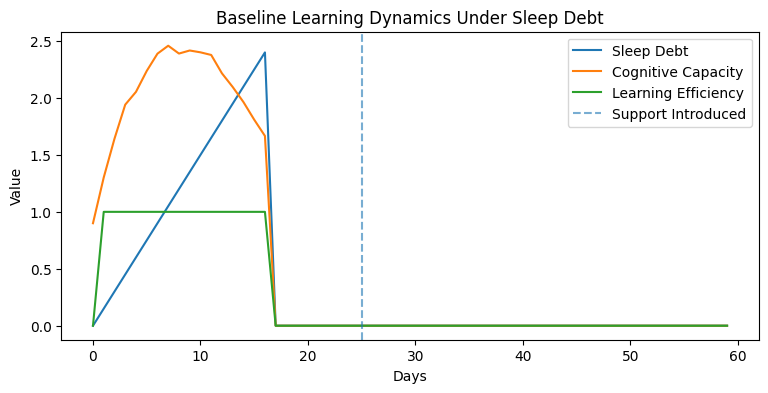

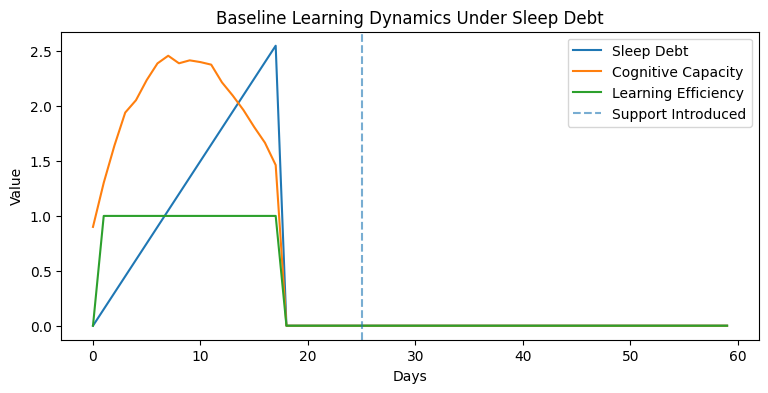

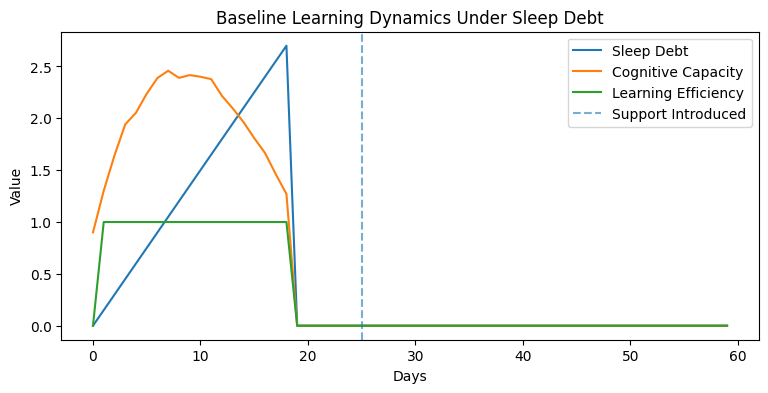

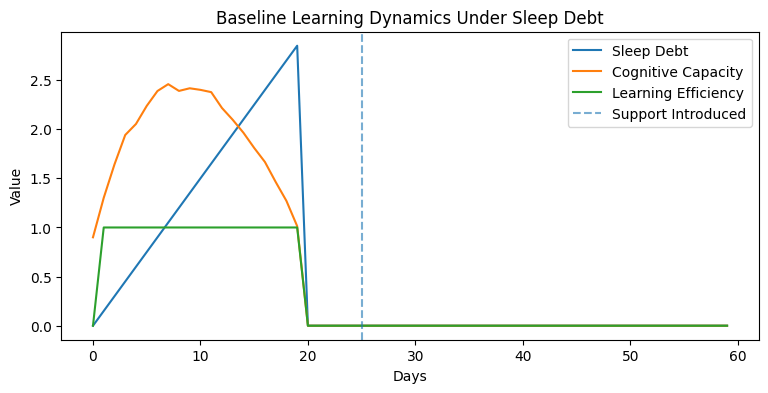

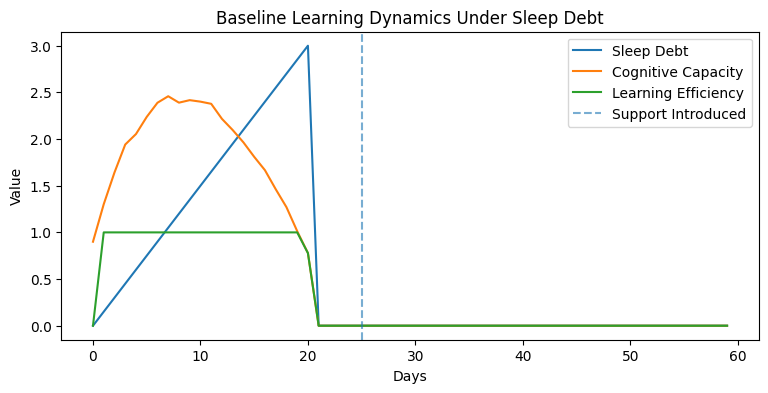

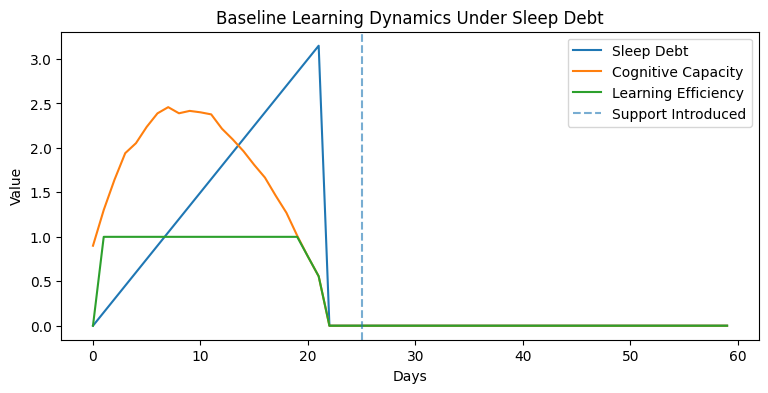

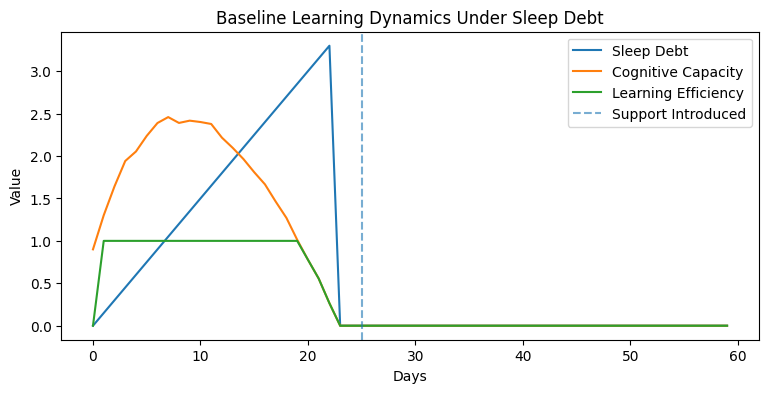

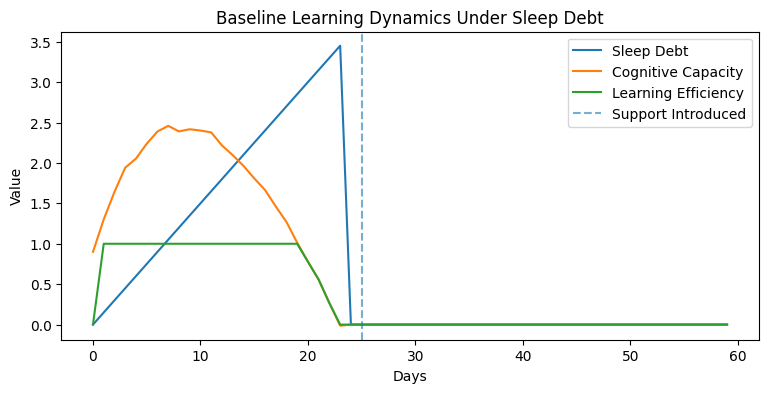

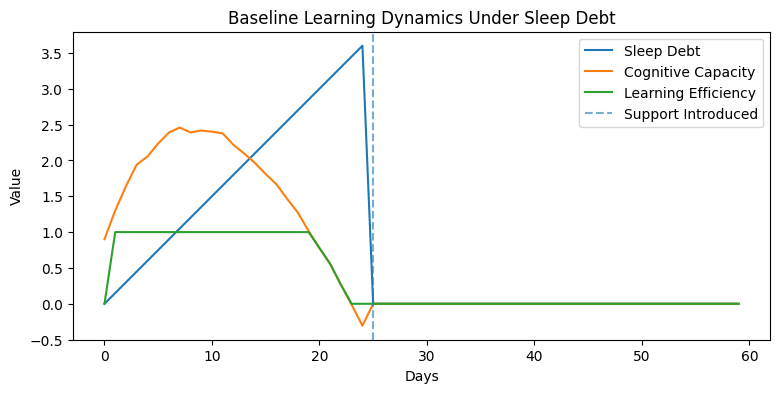

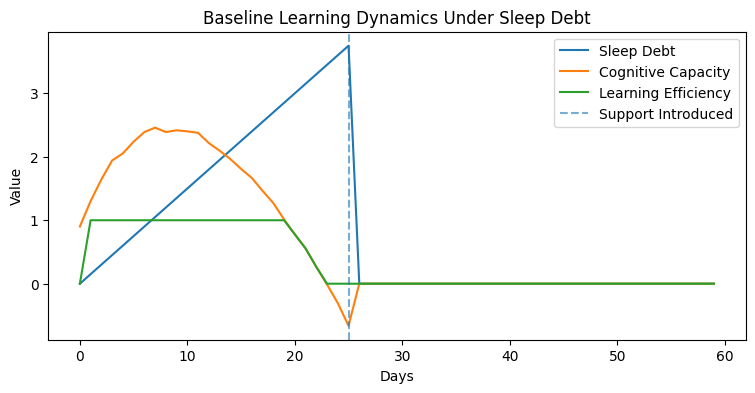

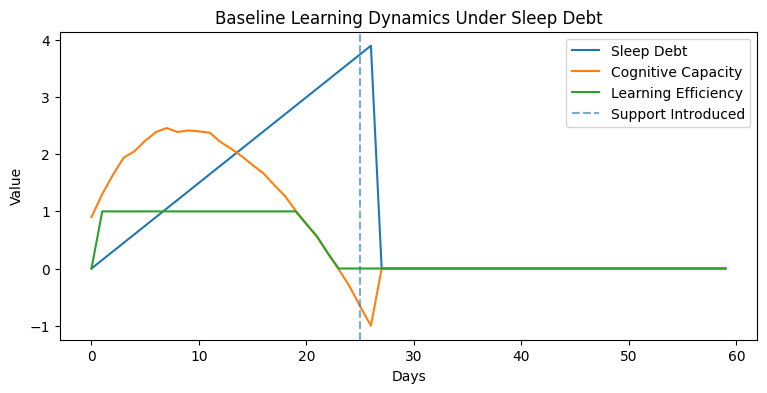

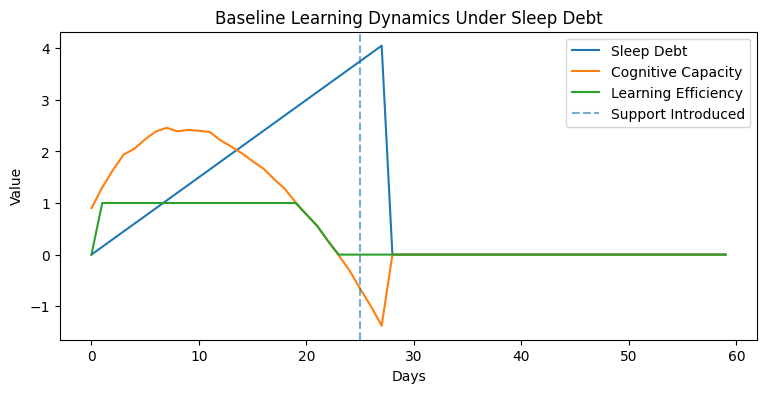

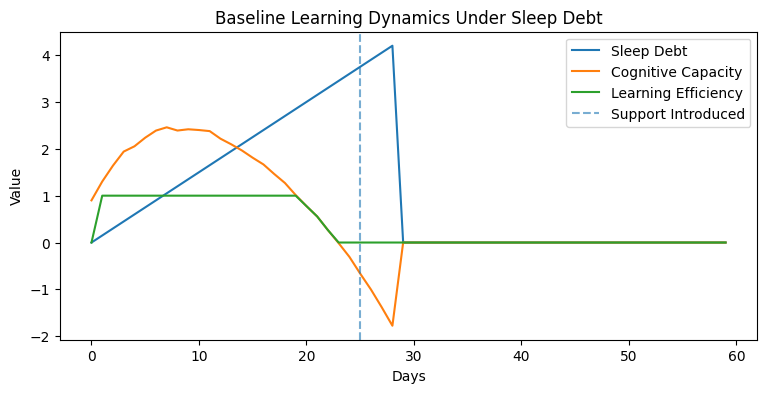

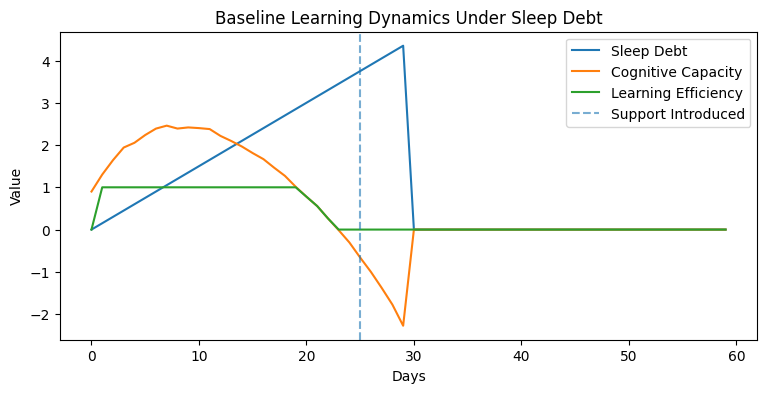

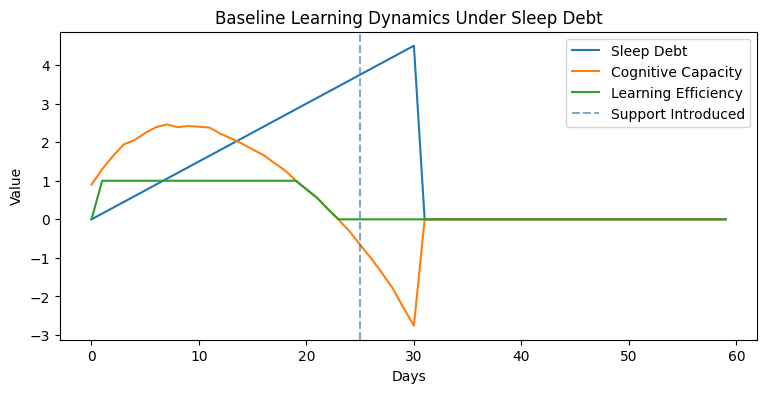

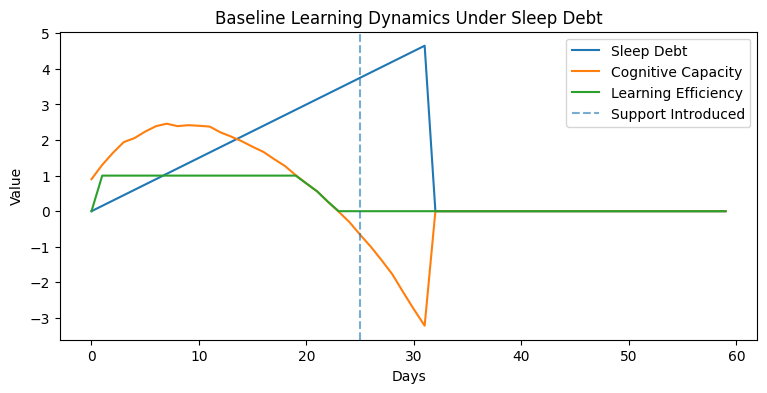

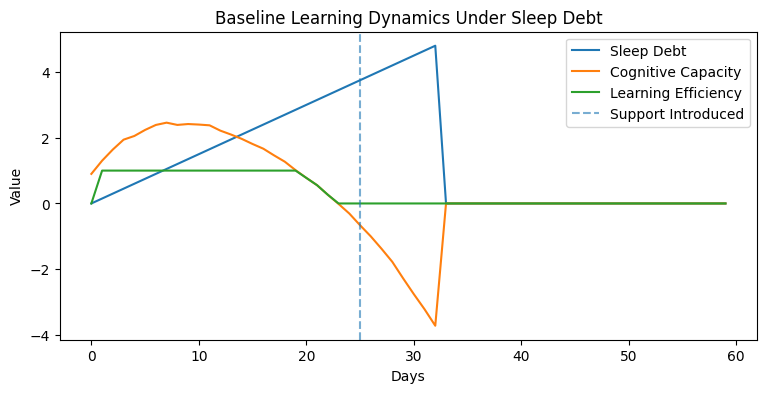

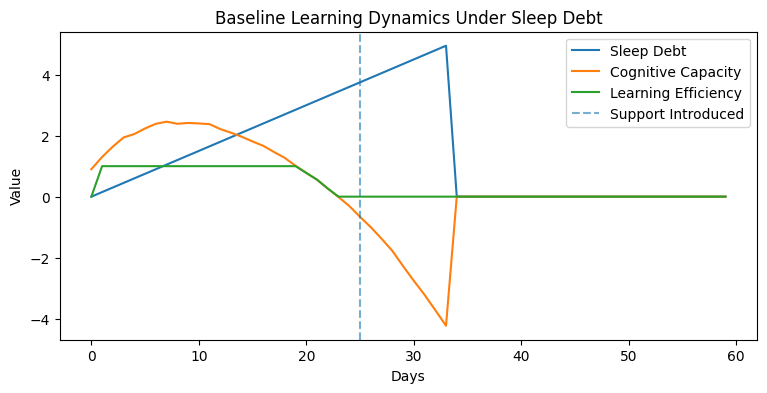

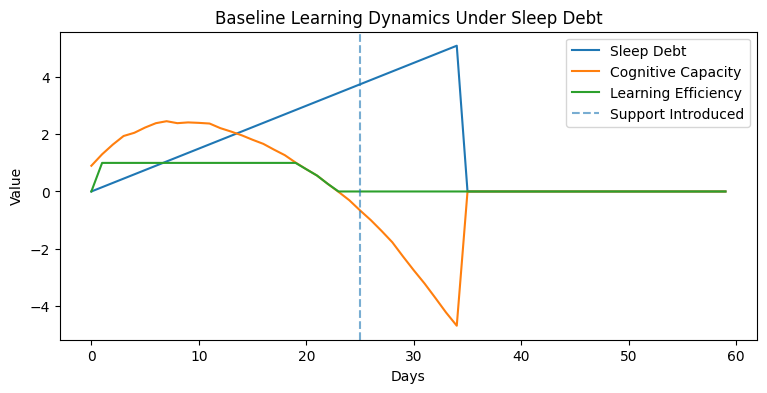

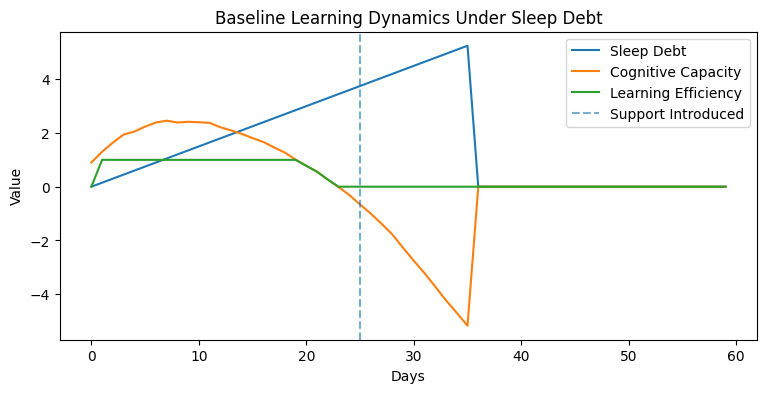

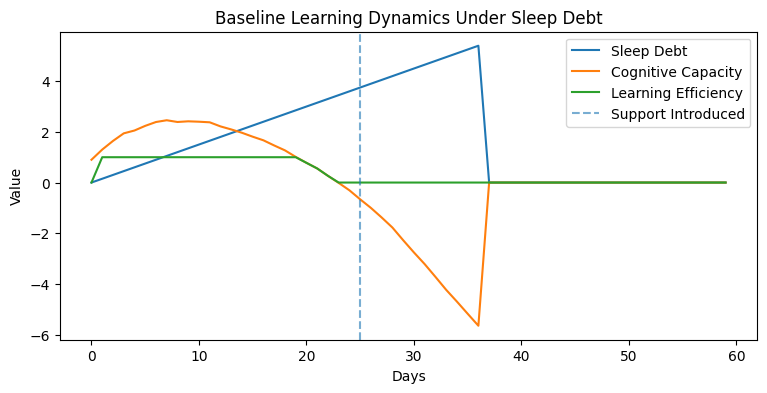

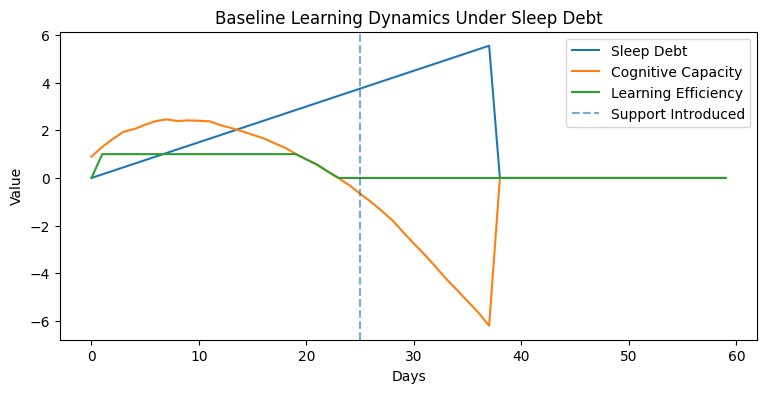

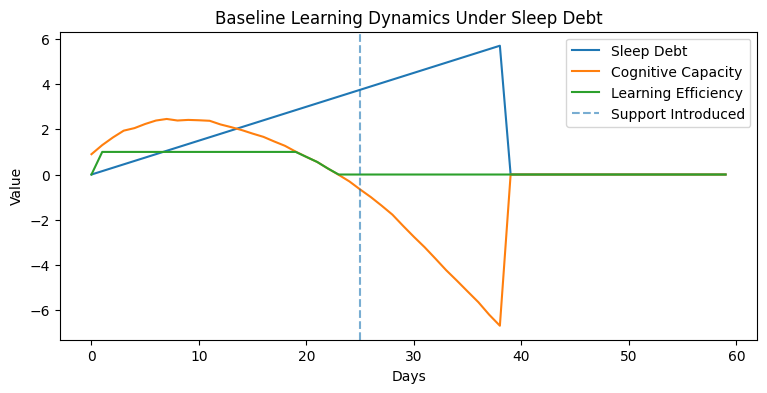

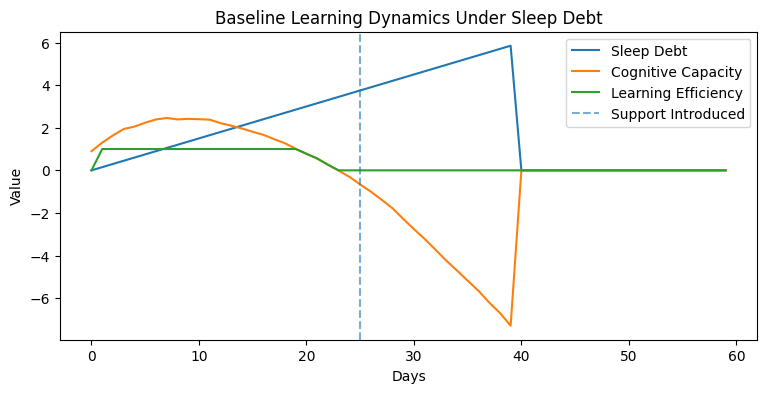

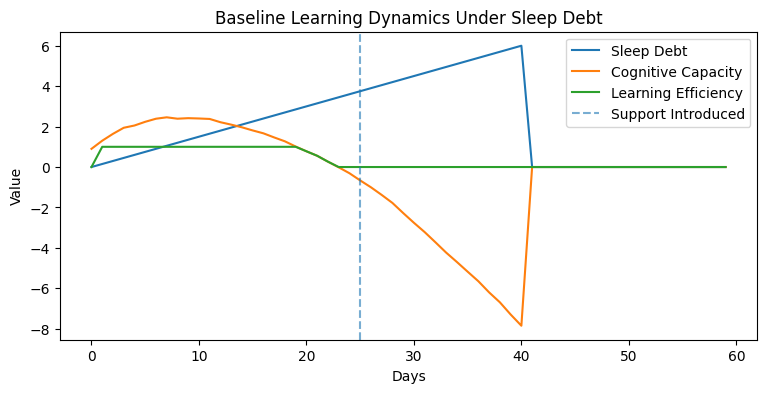

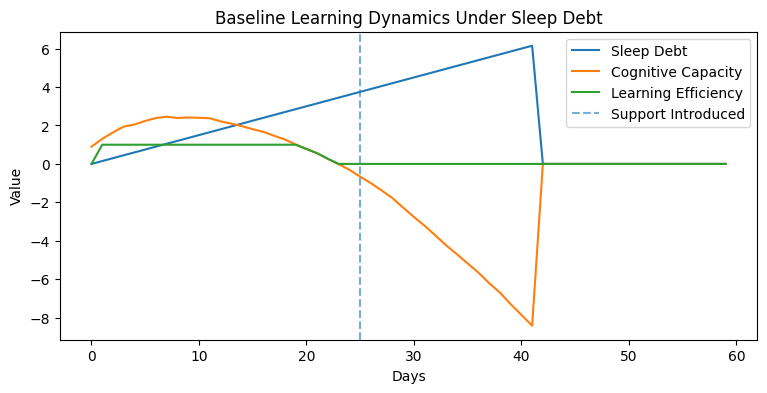

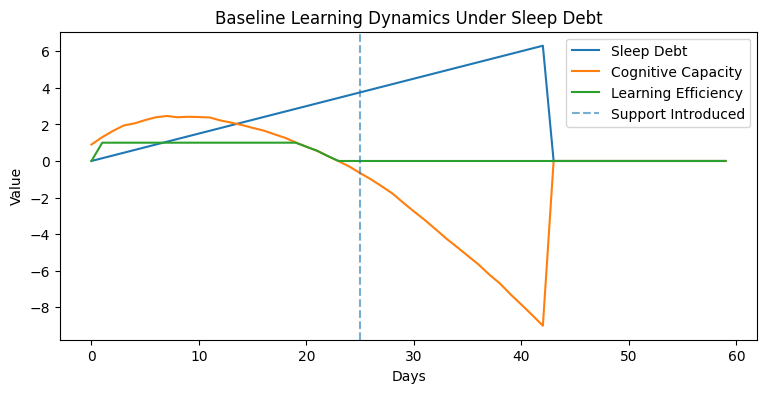

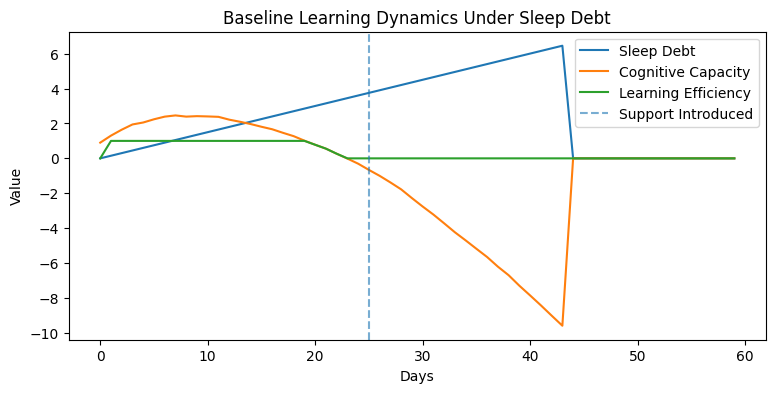

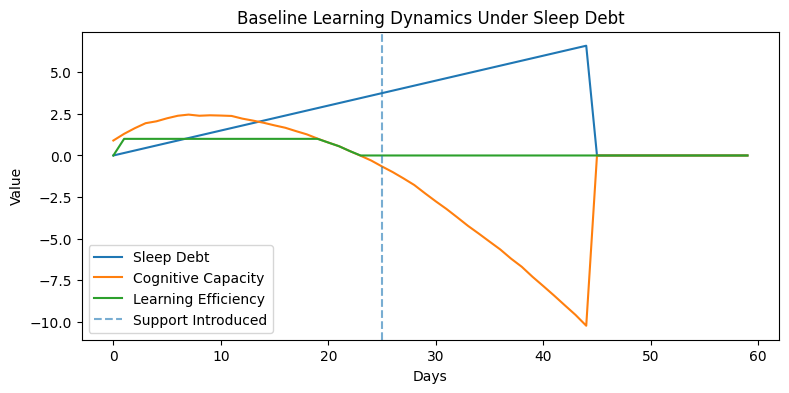

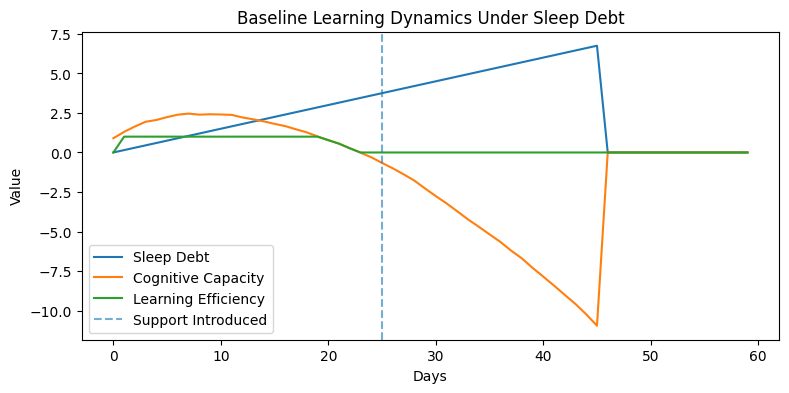

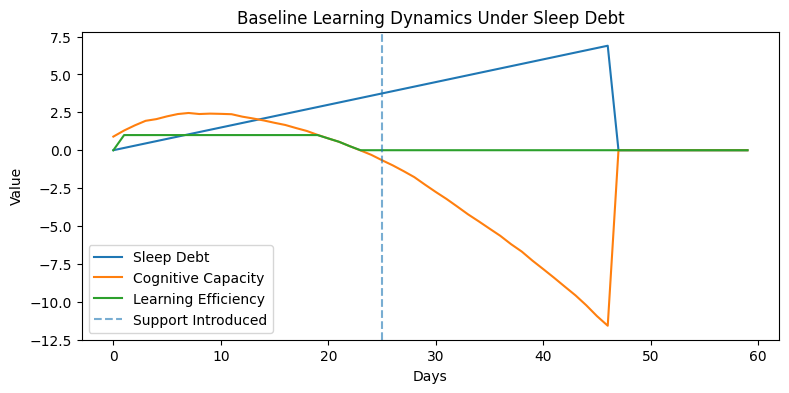

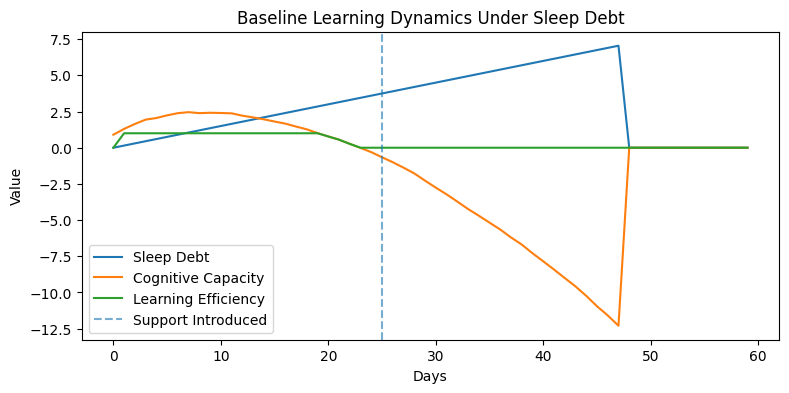

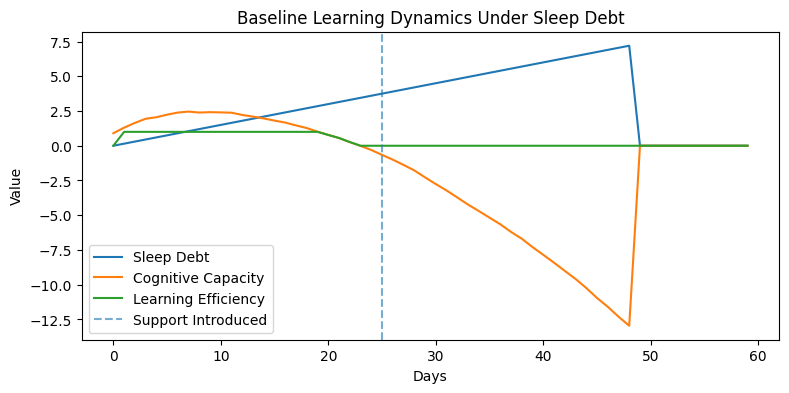

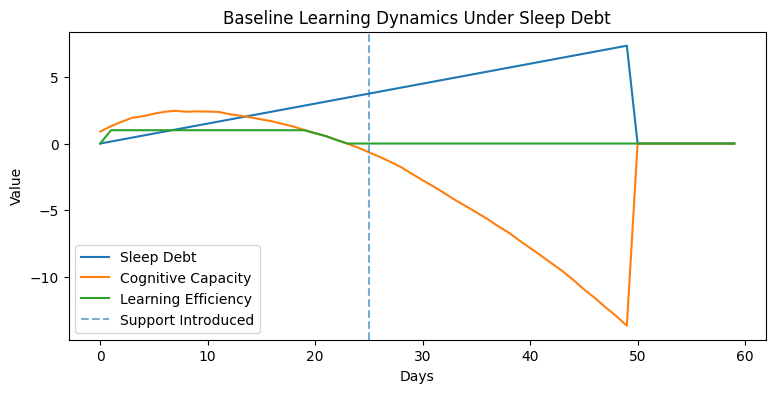

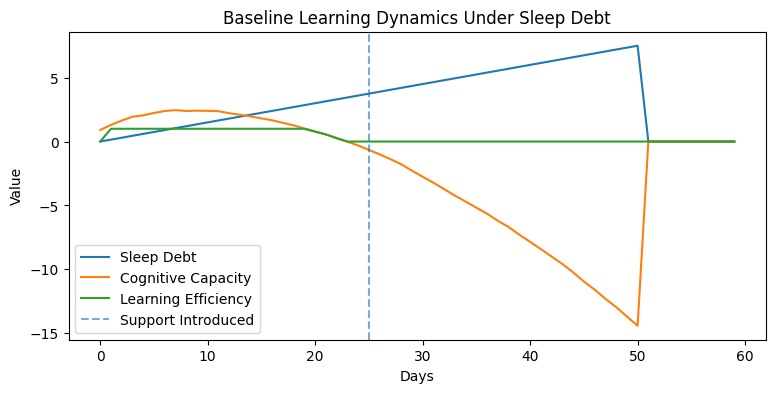

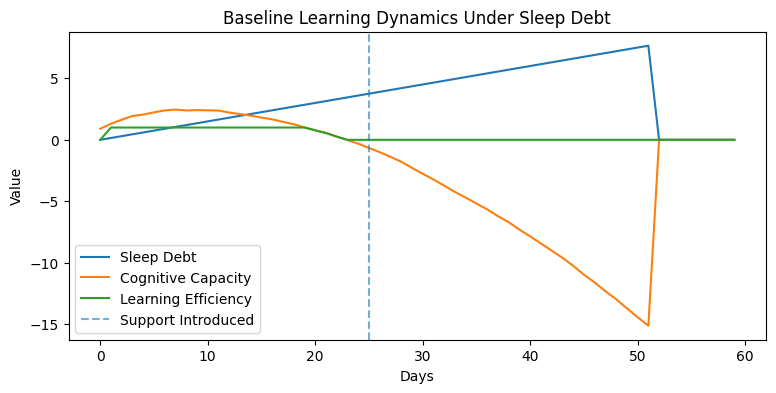

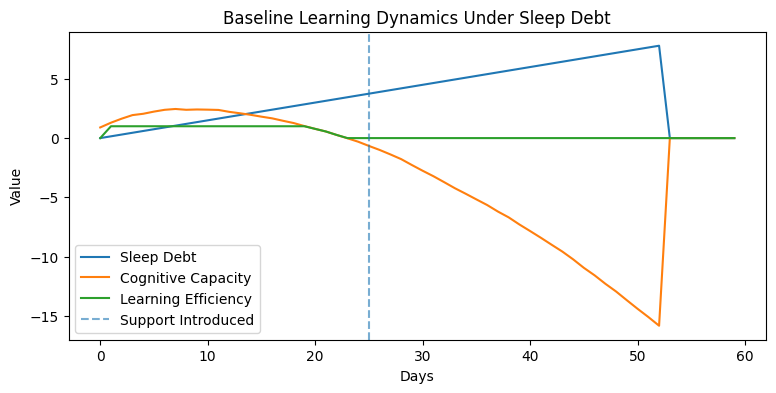

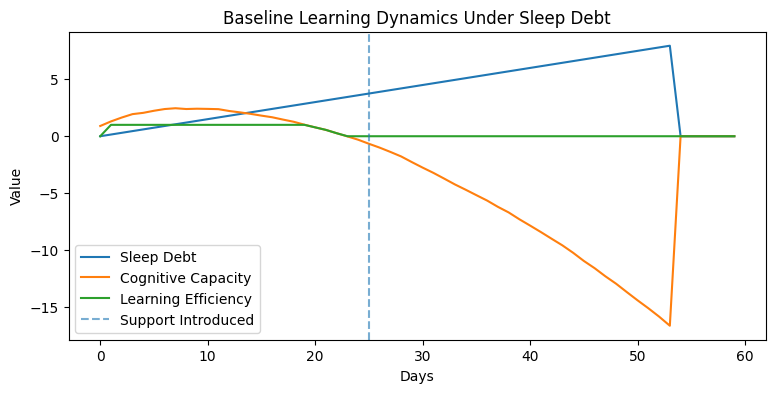

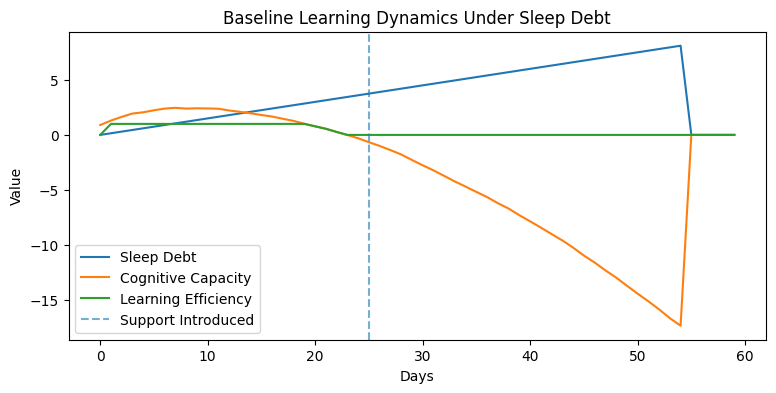

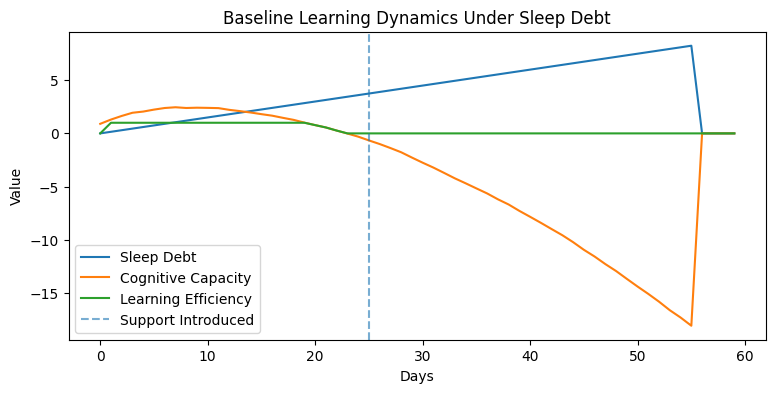

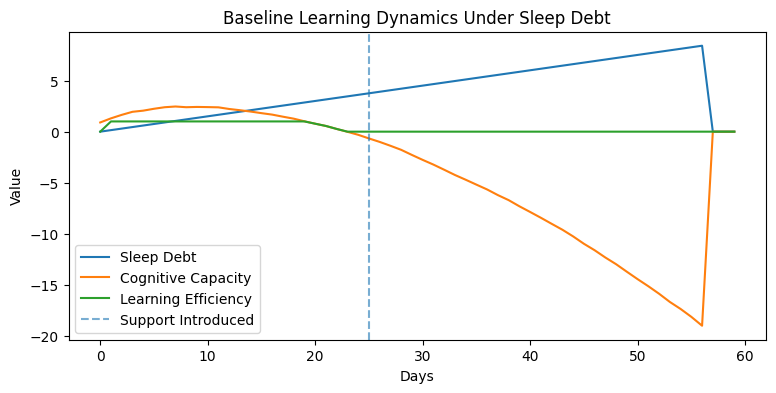

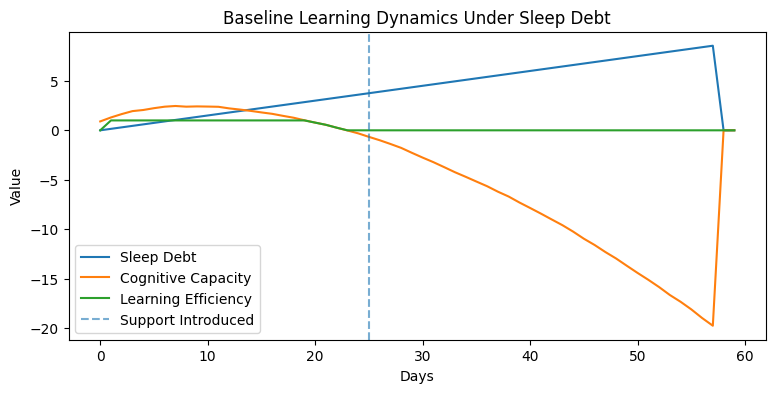

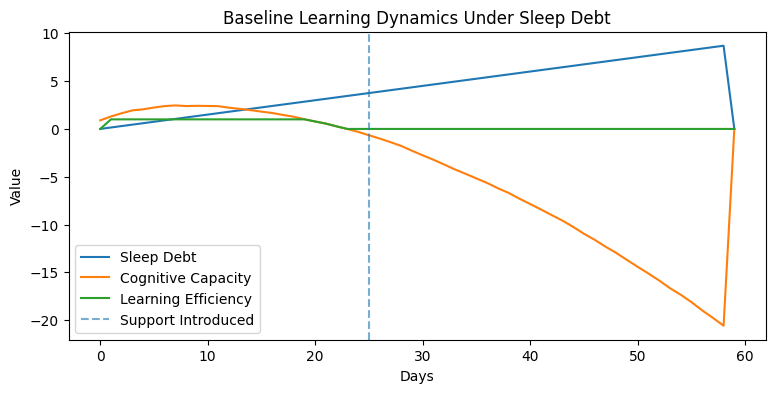

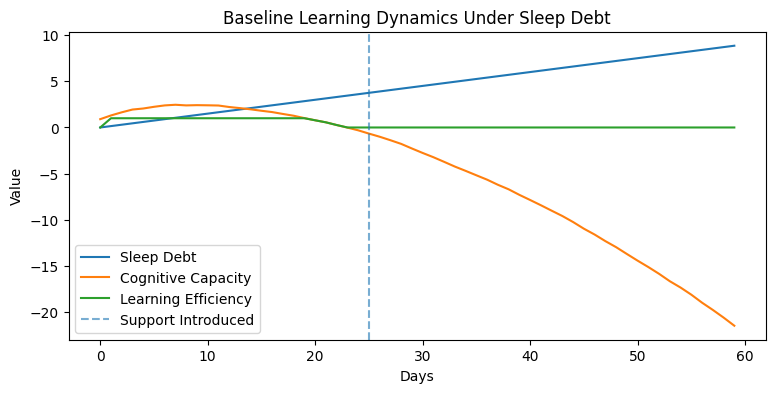

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Time horizon
T = 60
days = np.arange(T)

# Initialize arrays
sleep_debt = np.zeros(T)
cognitive_capacity = np.zeros(T)
learning_efficiency = np.zeros(T)

# Parameters
sleep_loss_per_day = 0.15
recovery_rate = 0.4
noise_level = 0.05

intervention_day = 25
supported_recovery_rate = 0.7

# Initial conditions
cognitive_capacity[0] = 0.9

for t in range(1, T):
    sleep_debt[t] = sleep_debt[t-1] + sleep_loss_per_day
    current_recovery = supported_recovery_rate if t >= intervention_day else recovery_rate
    recovery = current_recovery * np.exp(-sleep_debt[t-1] )
    cognitive_capacity[t] = cognitive_capacity[t-1] - 0.1 * sleep_debt[t-1] + recovery
    cognitive_capacity[t] += np.random.normal(0, noise_level)
    learning_efficiency[t] = np.clip(cognitive_capacity[t], 0, 1)
    plt.figure(figsize=(9,4) )
    plt.plot(days, sleep_debt, label="Sleep Debt")
    plt.plot(days, cognitive_capacity, label="Cognitive Capacity" )
    plt.plot(days, learning_efficiency, label="Learning Efficiency" )
    plt.xlabel("Days" )
    plt.ylabel("Value" )
    plt.title("Baseline Learning Dynamics Under Sleep Debt" )
    plt.axvline(intervention_day, linestyle="--", alpha=0.6, label="Support Introduced")
    plt.legend()
    plt.show()
               
    
